In [1]:
from pytadbit.parsers.genome_parser import parse_fasta

In [5]:
genome_seq = parse_fasta('/media/storage/db/reference_genome/Homo_sapiens/hg38/hg38.fa')

Parsing chr1
Parsing chr2
Parsing chr3
Parsing chr4
Parsing chr5
Parsing chr6
Parsing chr7
Parsing chr8
Parsing chr9
Parsing chr10
Parsing chr11
Parsing chr12
Parsing chr13
Parsing chr14
Parsing chr15
Parsing chr16
Parsing chr17
Parsing chr18
Parsing chr19
Parsing chr20
Parsing chr21
Parsing chr22
Parsing chrX
Parsing chrY
Parsing chrM


In [7]:
maps1= ['results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_full_1-end.map',
 'results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_frag_1-end.map']

In [12]:
maps2= ['results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_full_1-end.map',
 'results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_frag_1-end.map']

In [9]:
! mkdir -p results/HindIII/02_parsing

In [10]:
from pytadbit.parsers.map_parser import parse_map

In [13]:
parse_map(maps1, maps2, 
        'results/HindIII/02_parsing/read1.tsv',
         'results/HindIII/02_parsing/read2.tsv',
         genome_seq=genome_seq, re_name='HindIII',
         verbose=True)

Searching and mapping RE sites to the reference genome
Found 860368 RE sites
Loading read1
loading file: results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_full_1-end.map
loading file: results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_frag_1-end.map
Merge sort..........
Getting Multiple contacts
Loading read2
loading file: results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_full_1-end.map
loading file: results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_frag_1-end.map
Merge sort...........
Getting Multiple contacts


({0: {1: 5940550, 2: 4357315}, 1: {1: 6047543, 2: 4605716}},
 {0: 1521698, 1: 1622735})

In [14]:
! head -n 50 results/HindIII/02_parsing/read1.tsv

# Chromosome lengths (order matters):
# CRM chr1	248956422
# CRM chr2	242193529
# CRM chr3	198295559
# CRM chr4	190214555
# CRM chr5	181538259
# CRM chr6	170805979
# CRM chr7	159345973
# CRM chr8	145138636
# CRM chr9	138394717
# CRM chr10	133797422
# CRM chr11	135086622
# CRM chr12	133275309
# CRM chr13	114364328
# CRM chr14	107043718
# CRM chr15	101991189
# CRM chr16	90338345
# CRM chr17	83257441
# CRM chr18	80373285
# CRM chr19	58617616
# CRM chr20	64444167
# CRM chr21	46709983
# CRM chr22	50818468
# CRM chrX	156040895
# CRM chrY	57227415
# CRM chrM	16569
# Mapped	reads count by iteration
# MAPPED 1 5940550
# MAPPED 2 4357315
NS500645:59:HCL32BGXY:1:11101:10000:16279	chr10	88619681	0	75	88619497	88630956
NS500645:59:HCL32BGXY:1:11101:10000:8112~2~	chr3	36464657	0	59	36464653	36465449
NS500645:59:HCL32BGXY:1:11101:10002:9093	chr18	38400052	0	75	38399590	38401951
NS500645:59:HCL32BGXY:1:11101:10002:9922	chrX	72292745	0	75	72292652	72295414
NS500645:59:HCL32BGXY:1:11101:10003:18293	chrX

In [17]:
from pytadbit.mapping import get_intersection

In [20]:
mkdir -p results/HindIII/03_filtering/

In [22]:
get_intersection('results/HindIII/02_parsing/read1.tsv', 'results/HindIII/02_parsing/read2.tsv', 'results/HindIII/03_filtering/reads12.tsv')

IOError: [Errno 21] Is a directory: 'results/HindIII/03_filtering/reads12.tsv'

In [24]:
! rm -r results/HindIII/03_filtering/reads12.tsv

In [25]:
get_intersection('results/HindIII/02_parsing/read1.tsv', 'results/HindIII/02_parsing/read2.tsv', 'results/HindIII/03_filtering/reads12.tsv')

(8178944, {2: 2416873, 3: 139115, 4: 2})

In [6]:
from pytadbit.mapping.analyze import plot_distance_vs_interactions

In [ ]:
! head -n 50 results/HindIII/03_filtering/reads12.tsv

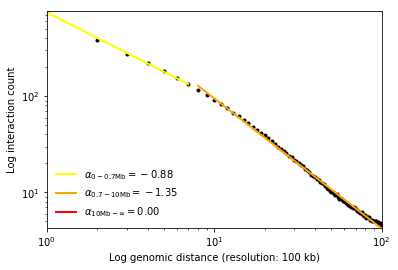

((-0.88265018662076211, 6.6096409815686386, -0.99863993019479413),
 (-1.3510972450064536, 7.6620507219365894, -0.99882287166937911),
 (0, 0, 0))

In [3]:
plot_distance_vs_interactions(
    'results/HindIII/03_filtering/reads12.tsv', 
    resolution=100000, max_diff=100, show=True)

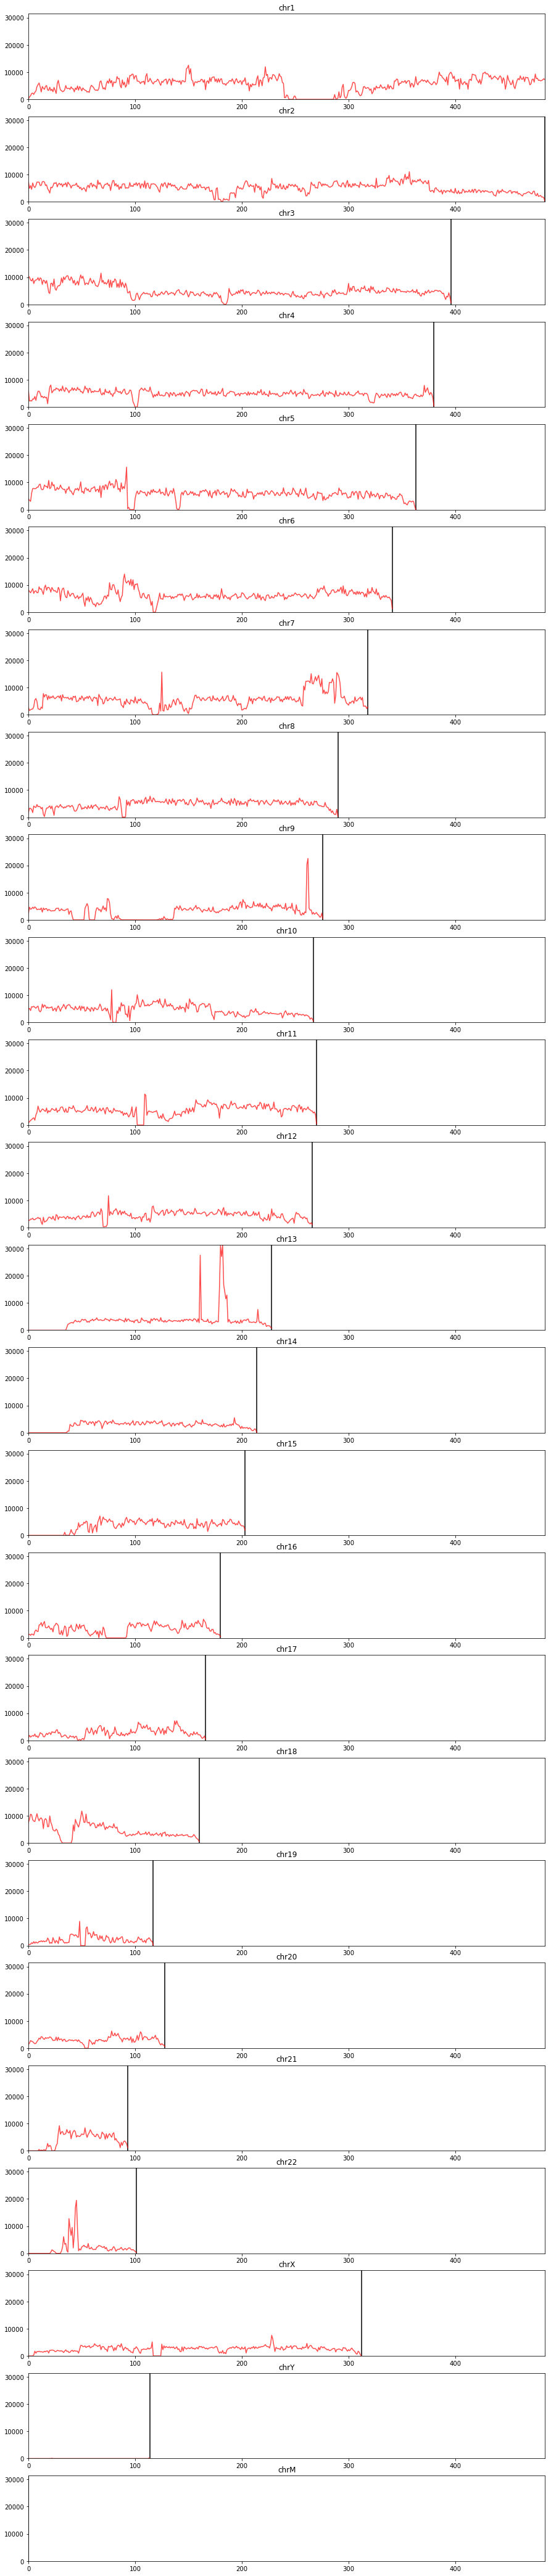

In [8]:
plot_genomic_distribution('results/HindIII/03_filtering/reads12.tsv', 
                          resolution=500000, show=True)

In [7]:
from pytadbit.mapping.analyze import plot_genomic_distribution

In [9]:
from pytadbit.mapping.analyze import hic_map

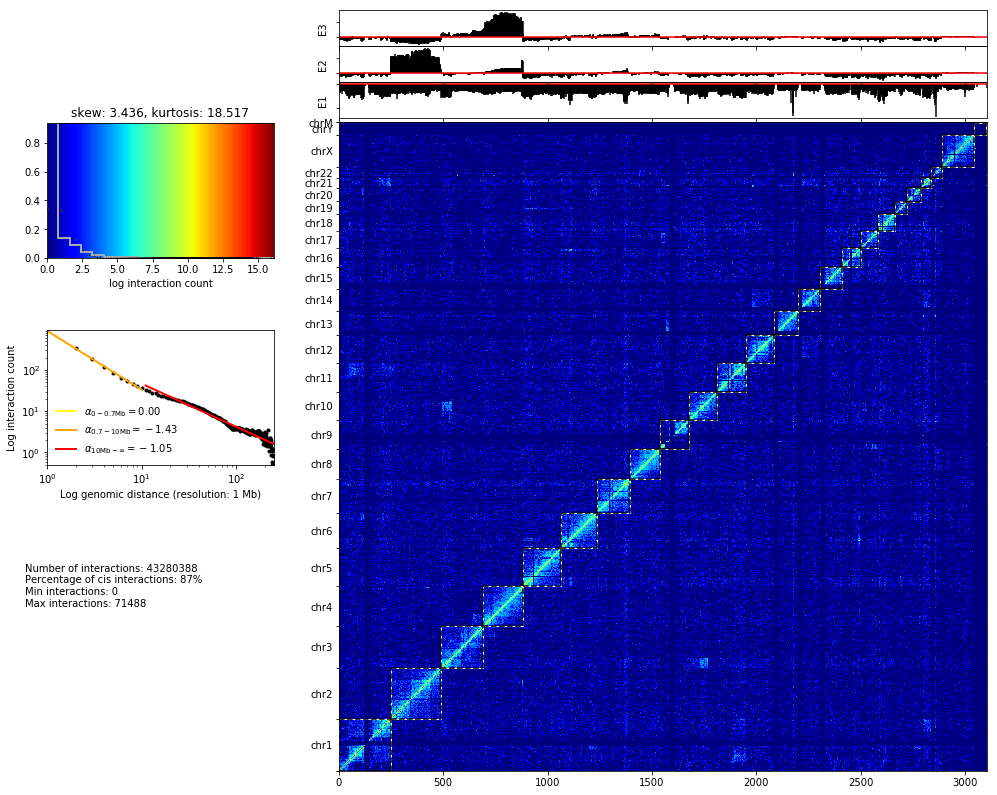

In [11]:
hic_map('results/HindIII/03_filtering/reads12.tsv',
       resolution=1000000, show=True)

In [12]:
from pytadbit.mapping.analyze import insert_sizes

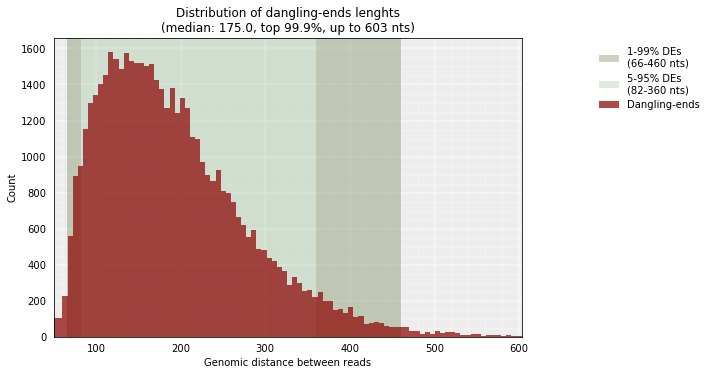

[175.0, 603.00300000000425]

In [13]:
insert_sizes('results/HindIII/03_filtering/reads12.tsv', show=True, nreads=100000)

In [14]:
from pytadbit.mapping.filter import filter_reads

In [15]:
filter_reads('results/HindIII/03_filtering/reads12.tsv', verbose=True, max_molecule_length=750)

Filtered reads (and percentage of total):

     Mapped both                :     27416565 (100.00%)
  -----------------------------------------------------
   1- self-circle               :        74766 (  0.27%)
   2- dangling-end              :      1320292 (  4.82%)
   3- error                     :        74790 (  0.27%)
   4- extra dangling-end        :      7547002 ( 27.53%)
   5- too close from RES        :      6554744 ( 23.91%)
   6- too short                 :       593706 (  2.17%)
   7- too large                 :         3686 (  0.01%)
   8- over-represented          :       822314 (  3.00%)
   9- duplicated                :     14032754 ( 51.18%)
  10- random breaks             :      1635716 (  5.97%)


{1: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_self-circle.tsv',
  'name': 'self-circle',
  'reads': 74766},
 2: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_dangling-end.tsv',
  'name': 'dangling-end',
  'reads': 1320292},
 3: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_error.tsv',
  'name': 'error',
  'reads': 74790},
 4: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_extra_dangling-end.tsv',
  'name': 'extra dangling-end',
  'reads': 7547002},
 5: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_close_from_RES.tsv',
  'name': 'too close from RES',
  'reads': 6554744},
 6: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_short.tsv',
  'name': 'too short',
  'reads': 593706},
 7: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_large.tsv',
  'name': 'too large',
  'reads': 3686},
 8: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_over-represented.tsv',
  'name': 'over-represented',
  'reads': 822314},
 9: {'fnam': 'results/HindIII/03_filt

In [16]:
filter_reads('results/HindIII/03_filtering/reads12.tsv', verbose=True, max_molecule_length=750, min_dist_to_re=500)

Filtered reads (and percentage of total):

     Mapped both                :     27416565 (100.00%)
  -----------------------------------------------------
   1- self-circle               :        74766 (  0.27%)
   2- dangling-end              :      1320292 (  4.82%)
   3- error                     :        74790 (  0.27%)
   4- extra dangling-end        :      7547002 ( 27.53%)
   5- too close from RES        :      6554744 ( 23.91%)
   6- too short                 :       593706 (  2.17%)
   7- too large                 :         3686 (  0.01%)
   8- over-represented          :       822314 (  3.00%)
   9- duplicated                :     14032754 ( 51.18%)
  10- random breaks             :      1936982 (  7.07%)


{1: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_self-circle.tsv',
  'name': 'self-circle',
  'reads': 74766},
 2: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_dangling-end.tsv',
  'name': 'dangling-end',
  'reads': 1320292},
 3: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_error.tsv',
  'name': 'error',
  'reads': 74790},
 4: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_extra_dangling-end.tsv',
  'name': 'extra dangling-end',
  'reads': 7547002},
 5: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_close_from_RES.tsv',
  'name': 'too close from RES',
  'reads': 6554744},
 6: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_short.tsv',
  'name': 'too short',
  'reads': 593706},
 7: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_large.tsv',
  'name': 'too large',
  'reads': 3686},
 8: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_over-represented.tsv',
  'name': 'over-represented',
  'reads': 822314},
 9: {'fnam': 'results/HindIII/03_filt

In [17]:
masked = {1: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_self-circle.tsv',
  'name': 'self-circle',
  'reads': 74766},
 2: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_dangling-end.tsv',
  'name': 'dangling-end',
  'reads': 1320292},
 3: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_error.tsv',
  'name': 'error',
  'reads': 74790},
 4: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_extra_dangling-end.tsv',
  'name': 'extra dangling-end',
  'reads': 7547002},
 5: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_close_from_RES.tsv',
  'name': 'too close from RES',
  'reads': 6554744},
 6: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_short.tsv',
  'name': 'too short',
  'reads': 593706},
 7: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_large.tsv',
  'name': 'too large',
  'reads': 3686},
 8: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_over-represented.tsv',
  'name': 'over-represented',
  'reads': 822314},
 9: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_duplicated.tsv',
  'name': 'duplicated',
  'reads': 14032754},
 10: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_random_breaks.tsv',
  'name': 'random breaks',
  'reads': 1635716}}

In [18]:
masked

{1: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_self-circle.tsv',
  'name': 'self-circle',
  'reads': 74766},
 2: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_dangling-end.tsv',
  'name': 'dangling-end',
  'reads': 1320292},
 3: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_error.tsv',
  'name': 'error',
  'reads': 74790},
 4: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_extra_dangling-end.tsv',
  'name': 'extra dangling-end',
  'reads': 7547002},
 5: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_close_from_RES.tsv',
  'name': 'too close from RES',
  'reads': 6554744},
 6: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_short.tsv',
  'name': 'too short',
  'reads': 593706},
 7: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_large.tsv',
  'name': 'too large',
  'reads': 3686},
 8: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_over-represented.tsv',
  'name': 'over-represented',
  'reads': 822314},
 9: {'fnam': 'results/HindIII/03_filt

In [19]:
from pytadbit.mapping.filter import apply_filter

In [21]:
apply_filter('results/HindIII/03_filtering/reads12.tsv', 'results/HindIII/03_filtering/reads12_valid.tsv',
            masked, filters=[1,2,3,4,9,10])

    saving to file 8482577 reads without .


8482577

In [22]:
! head results/HindIII/03_filtering/reads12_valid.tsv

# CRM chr1	248956422
# CRM chr2	242193529
# CRM chr3	198295559
# CRM chr4	190214555
# CRM chr5	181538259
# CRM chr6	170805979
# CRM chr7	159345973
# CRM chr8	145138636
# CRM chr9	138394717
# CRM chr10	133797422


In [24]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [25]:
r_enz_1 = 'HindIII'
r_enz_2 = 'MboI'
reso = 1000000

In [26]:
hic_data_1 = load_hic_data_from_reads(
    'results/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz_1),
    reso)
hic_data_2 = load_hic_data_from_reads(
    'results/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz_2),
    reso)


   124   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   742   931
   932  1295  1563  1567  1571  1572  1586  1587  1588  1589  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599
  1600  1601  1721  1867  1868  2085  2086  2087  2088  2089  2090  2091  2092  2093  2094  2095  2096  2097  2098  2099
  2100  2101  2102  2200  2201  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211  2212  2213  2214  2215  2216
  2217  2307  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317  2318  2319  2320  2321  2322  2323  2324  2447
  2448  2449  2450  2451  2452  2453  2454  2455  2601  2602  2603  2604  2691  2692  2752  2790  2791  2792  2793  2794
  2801  2837  2838  2839  2840  2841  2842  2843  2844  2845  2846  2850  2851  2888  2889  2947  2948  2949  3044  3045
  3046  3047  3052  3053  3054  3059  3060  3061  3062  3063  3067  3068  3069  3070  3072  3073  3074  3075  3076  3077
  3078  3079  3080  3081  3082 

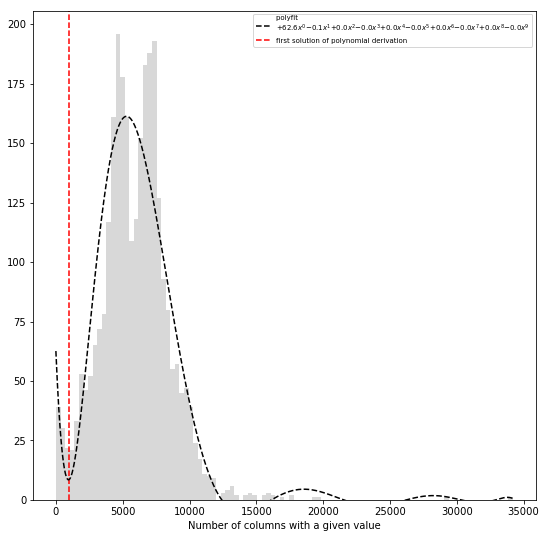


     1   121   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140
   141   142   143   144   145   147   149   337   340   341   342   492   584   585   691   742   882   930   931   932
   953  1064  1124  1294  1295  1296  1403  1440  1441  1541  1563  1564  1565  1566  1567  1571  1572  1581  1582  1583
  1585  1586  1587  1588  1589  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1602  1603  1604
  1605  1606  1607  1608  1609  1680  1721  1866  1867  1868  1950  1986  1987  2085  2086  2087  2088  2089  2090  2091
  2092  2093  2094  2095  2096  2097  2098  2099  2100  2101  2102  2199  2200  2201  2202  2203  2204  2205  2206  2207
  2208  2209  2210  2211  2212  2213  2214  2215  2216  2217  2218  2307  2308  2309  2310  2311  2312  2313  2314  2315
  2316  2317  2318  2319  2320  2321  2322  2323  2324  2325  2326  2327  2329  2446  2447  2448  2449  2450  2451  2452
  2453  2454  2455  2500  2524 

Found 269 of 3102 columns with poor signal


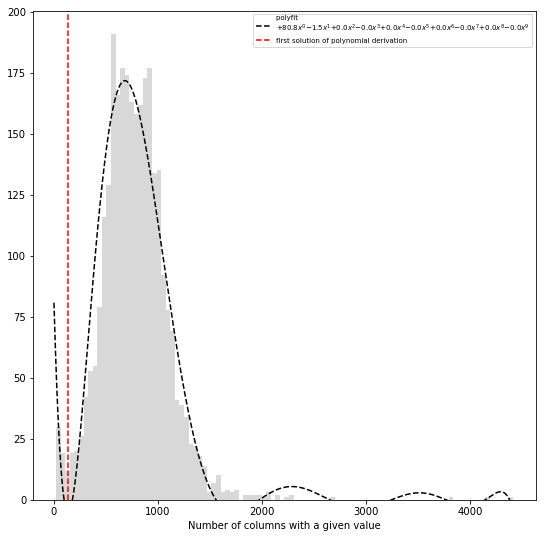

Found 266 of 3102 columns with poor signal



     1   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141
   142   143   145   340   341   342   343   492   584   585   691   742   882   930   931   932   953  1124  1294  1295
  1296  1297  1403  1440  1441  1541  1563  1564  1565  1566  1567  1571  1572  1581  1582  1585  1586  1587  1588  1589
  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1602  1603  1604  1605  1606  1607  1608  1609
  1680  1721  1722  1866  1867  1868  1950  1986  1987  2085  2086  2087  2088  2089  2090  2091  2092  2093  2094  2095
  2096  2097  2098  2099  2100  2101  2102  2199  2200  2201  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211
  2212  2213  2214  2215  2216  2217  2218  2307  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317  2318  2319
  2320  2321  2322  2323  2324  2325  2326  2327  2329  2444  2446  2447  2448  2449  2450  2451  2452  2453  2454  2455
  2500  2524  2525  2526  2584 

In [27]:
hic_data_1.filter_columns(draw_hist=True, min_count=10, by_mean=True)
hic_data_2.filter_columns(draw_hist=True, min_count=10, by_mean=True)

In [28]:
print len(hic_data_1)
print len(hic_data_1.bads)
print len(hic_data_2)
print len(hic_data_2.bads)

3102
269
3102
266


In [29]:
hic_data_1.normalize_hic(iterations=10, max_dev=0.1)
hic_data_2.normalize_hic(iterations=10, max_dev=0.1)

iterative correction
  - copying matrix
  - computing baises
           925.000        6068.627       36651.000    0   5.03942
          2590.992        6890.690       22954.353    1   2.33121
          2565.382        7406.752       11323.117    2   0.65364
          5564.614        7714.378       17646.667    3   1.28750
          3907.979        7920.873        9984.402    4   0.50662
          6575.573        8053.562       14122.857    5   0.75362
          5078.471        8144.699        9498.490    6   0.37647
          7182.960        8205.508       11988.885    7   0.46108
          6012.410        8247.864        9191.391    8   0.27103
          7526.569        8276.798       10683.760    9   0.29081
          6714.214        8297.160        8971.088   10   0.19078
rescaling to factor 1
  - getting the sum of the matrix
    => 2837.829
  - rescaling biases
iterative correction
  - copying matrix
  - computing baises
           138.000         790.629        4403.000    0   4

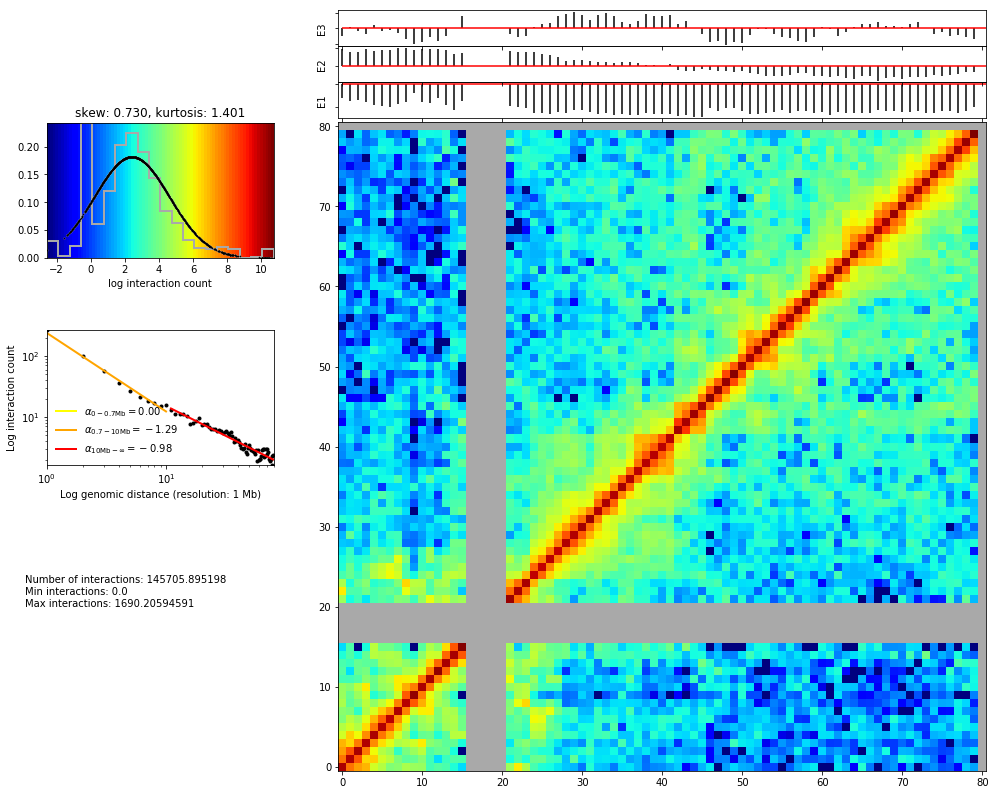

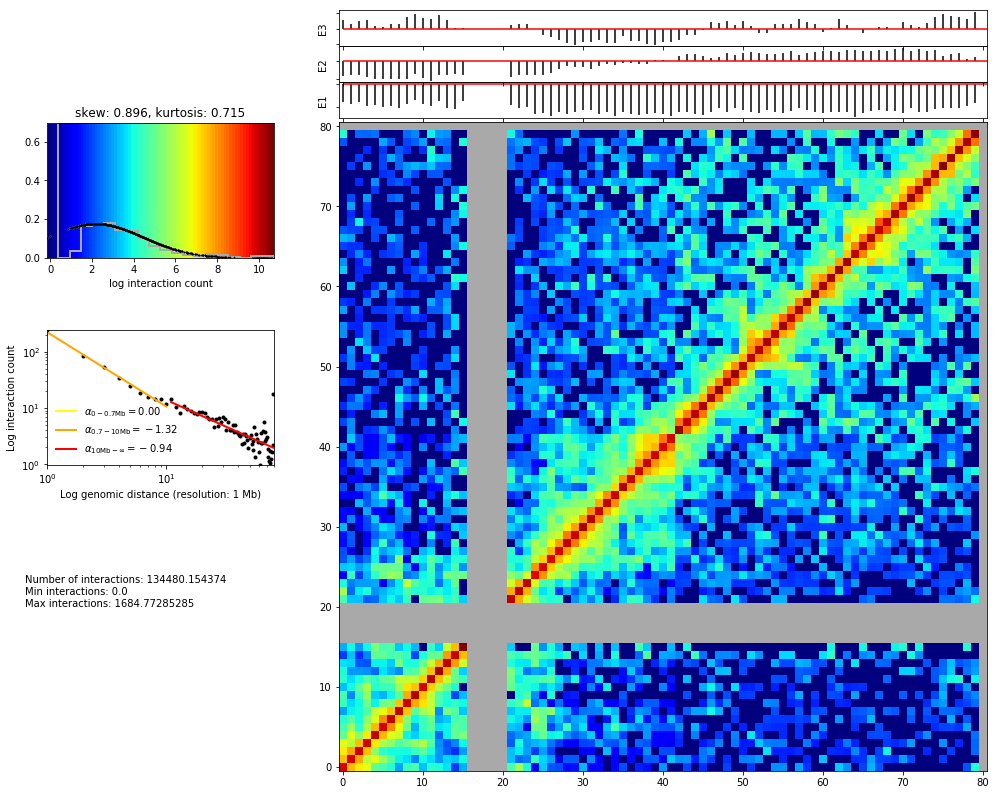

In [30]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data_1, normalized=True, focus='chr18', show=True)
hic_map(hic_data_2, normalized=True, focus='chr18', show=True)

In [31]:
from cPickle import dump


In [32]:
! mkdir -p results/$r_enz_1/04_normalizing
! mkdir -p results/$r_enz_2/04_normalizing

In [33]:
out = open('results/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz_1), 'w')
dump(hic_data_1.bias, out)
out.close()
out = open('results/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz_2), 'w')
dump(hic_data_2.bias, out)
out.close()

In [34]:
out = open('results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz_1), 'w')
dump(hic_data_1.bads, out)
out.close()
out = open('results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz_2), 'w')
dump(hic_data_2.bads, out)
out.close()

In [35]:
! dryhic3.r results/HindIII/03_filtering/valid_reads12_HindIII.tsv \
       results/HindIII/04_normalizing/bad_columns_1000000_HindIII.pick \
       HindIII hg38 1000000 results/HindIII/04_normalizing/biases_dryhic_1000000_HindIII.pick

Getting contacts
Read 8626149 rows and 2 (of 13) columns from 0.969 GB file in 00:00:05
Getting genomic features
Merging info
Getting bad bins
Computing biases
Storing results


In [36]:
! dryhic3.r results/MboI/03_filtering/valid_reads12_MboI.tsv \
       results/MboI/04_normalizing/bad_columns_1000000_MboI.pick \
       MboI hg38 1000000 results/MboI/04_normalizing/biases_dryhic_1000000_MboI.pick

Getting contacts
Getting genomic features
Merging info
Getting bad bins
Computing biases
Storing results


In [37]:
bias_dry_path = 'results/{1}/04_normalizing/biases_dryhic_{0}_{1}.tsv'

hic_data_1.bias = dict([(int(l.split()[0]), float(l.split()[1])) for l in open(bias_dry_path.format(reso, 'HindIII'))])
hic_data_2.bias = dict([(int(l.split()[0]), float(l.split()[1])) for l in open(bias_dry_path.format(reso, 'MboI'))])

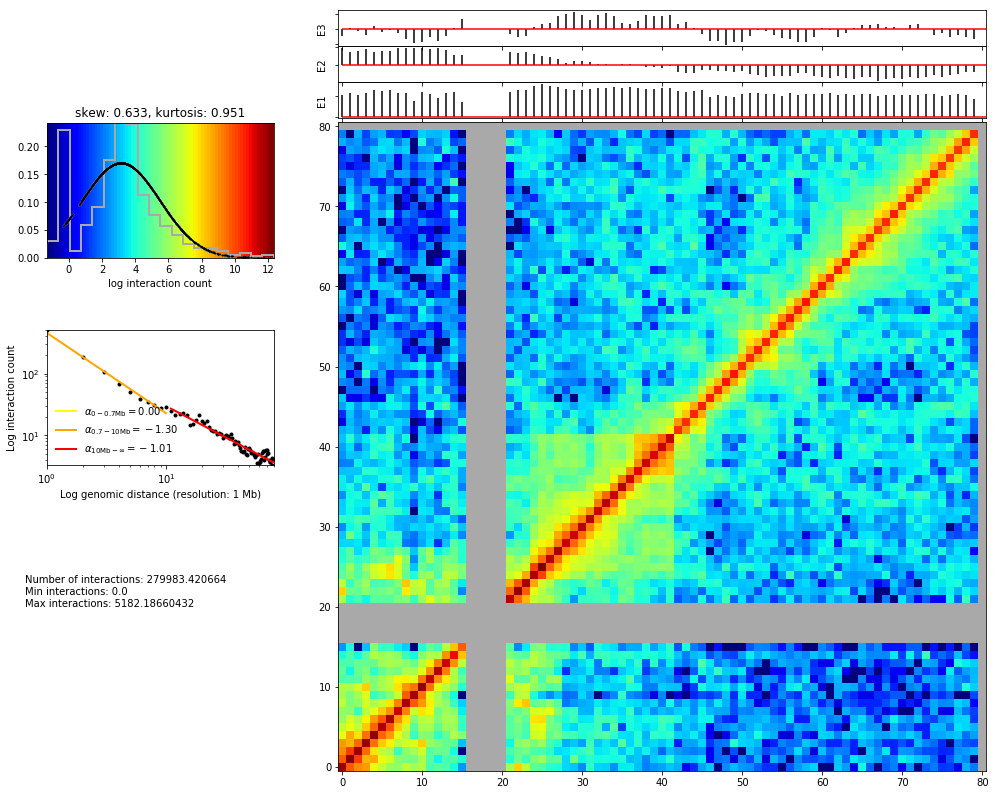

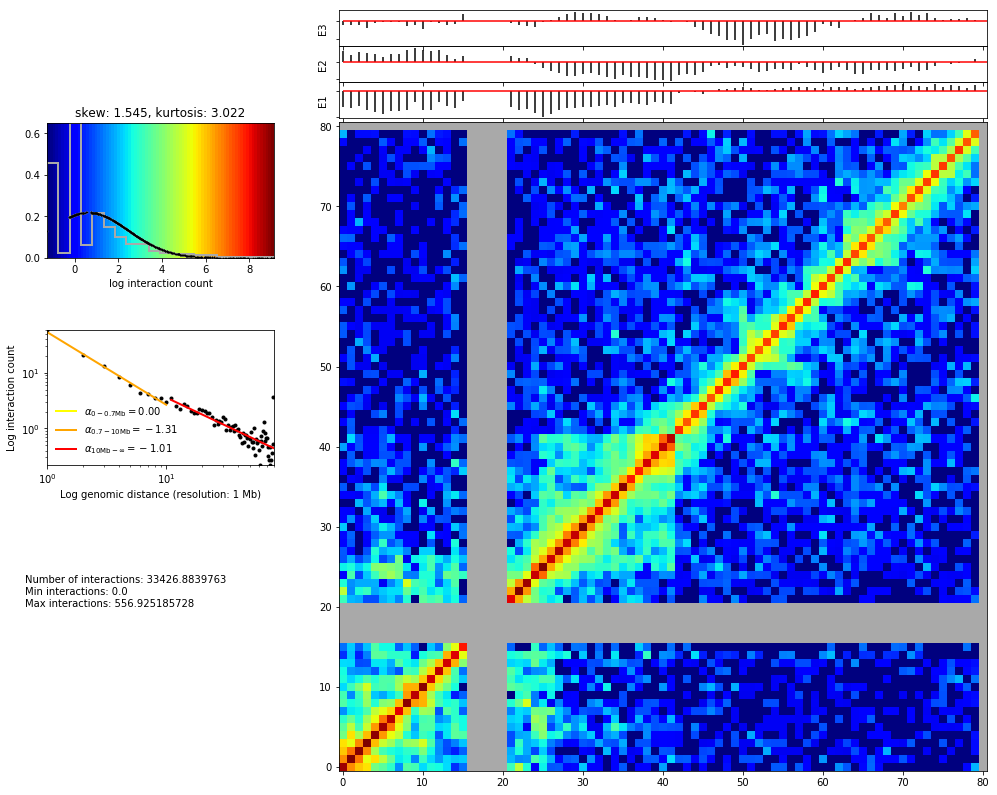

In [38]:
hic_map(hic_data_1, normalized=True, focus='chr18', show=True)
hic_map(hic_data_2, normalized=True, focus='chr18', show=True)

In [39]:


hic_map(hic_data_1, by_chrom='intra', normalized=False,
       savedata='results/{1}/04_normalizing/{0}_raw'.format(reso, r_enz_1))
hic_map(hic_data_2, by_chrom='intra', normalized=False,
       savedata='results/{1}/04_normalizing/{0}_raw'.format(reso, r_enz_2))



In [40]:
hic_map(hic_data_1, by_chrom='intra', normalized=True,
       savedata='results/{1}/04_normalizing/{0}_norm'.format(reso, r_enz_1))
hic_map(hic_data_2, by_chrom='intra', normalized=True,
       savedata='results/{1}/04_normalizing/{0}_norm'.format(reso, r_enz_2))

In [41]:
if reso >= 300000:
    hic_map(hic_data_1, by_chrom=False, normalized=False,
            savedata='results/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz_1))

    hic_map(hic_data_1, by_chrom=False, normalized=True,
            savedata='results/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz_1))
    hic_map(hic_data_2, by_chrom=False, normalized=False,
            savedata='results/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz_2))

    hic_map(hic_data_2, by_chrom=False, normalized=True,
            savedata='results/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz_2))